In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import numpy as np
from cycler import cycler
%matplotlib inline

In [2]:
!ls ../data/

enregistrement_AM_2017-10-23_100057.asc
enregistrement_AM_2017-10-23_100057.edf
enregistrement_AM_2017-10-23_100057.pkl
enregistrement_BMC_2017-09-26_095637.asc
enregistrement_BMC_2017-09-26_095637.EDF
enregistrement_BMC_2017-09-26_095637.pkl
enregistrement_CS_2017-10-03_134421.asc
enregistrement_CS_2017-10-03_134421.edf
enregistrement_CS_2017-10-03_134421.pkl
enregistrement_DC_2017-09-27_161040.asc
enregistrement_DC_2017-09-27_161040.edf
enregistrement_DC_2017-09-27_161040.pkl
enregistrement_FM_2017-10-03_143803.asc
enregistrement_FM_2017-10-03_143803.EDF
enregistrement_FM_2017-10-03_143803.pkl
enregistrement_IP_2017-09-28_115250.asc
enregistrement_IP_2017-09-28_115250.edf
enregistrement_IP_2017-09-28_115250.pkl
enregistrement_LB_2017-09-20_151043 (1).asc
enregistrement_LB_2017-09-20_151043.asc
enregistrement_LB_2017-09-20_151043.edf
enregistrement_LB_2017-09-20_151043.pkl
enregistrement_OP_2017-10-26_121823.asc
enregistrement_OP_2017-10-26_121823.edf
enregistrement_OP_2017-10-26_1218

In [3]:
timeStr = '2017-09-26_162348'
observer = 'DC'
mode = 'pari'

file = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [4]:
file = os.path.join('parametre', 'param_Fit_' + observer + '.pkl')
with open(file, 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')

In [5]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
p = exp['p']
results = (exp['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
a_anti_0_1 = param['a_anti']

In [6]:
print(results)

[[ 0.395  0.675  0.795]
 [ 0.525  0.795  0.85 ]
 [ 0.145  0.105  0.145]
 [ 0.49   0.785  0.145]
 [ 0.205  0.805  0.145]
 [ 0.69   0.4    0.145]
 [ 0.595  0.25   0.145]
 [ 0.33   0.265  0.07 ]
 [ 0.09   0.265  0.035]
 [ 0.29   0.7    0.03 ]
 [ 0.43   0.71   0.   ]
 [ 0.62   0.17   0.   ]
 [ 0.74   0.5    0.   ]
 [ 0.39   0.145  0.   ]
 [ 0.225  0.15   0.   ]
 [ 0.635  0.15   0.   ]
 [ 0.26   0.095  0.   ]
 [ 0.32   0.095  0.   ]
 [ 0.695  0.12   0.   ]
 [ 0.805  0.135  0.   ]
 [ 0.28   0.7    0.845]
 [ 0.565  0.195  0.13 ]
 [ 0.74   0.19   0.125]
 [ 0.325  0.135  0.245]
 [ 0.23   0.135  0.84 ]
 [ 0.4    0.62   0.89 ]
 [ 0.64   0.12   0.3  ]
 [ 0.82   0.125  0.205]
 [ 0.655  0.125  0.135]
 [ 0.605  0.125  0.76 ]
 [ 0.37   0.125  0.8  ]
 [ 0.66   0.125  0.875]
 [ 0.495  0.125  0.935]
 [ 0.395  0.125  0.115]
 [ 0.195  0.125  0.26 ]
 [ 0.27   0.125  0.395]
 [ 0.105  0.125  0.605]
 [ 0.23   0.125  0.465]
 [ 0.34   0.125  0.655]
 [ 0.65   0.125  0.755]
 [ 0.785  0.125  0.83 ]
 [ 0.83   0.125 

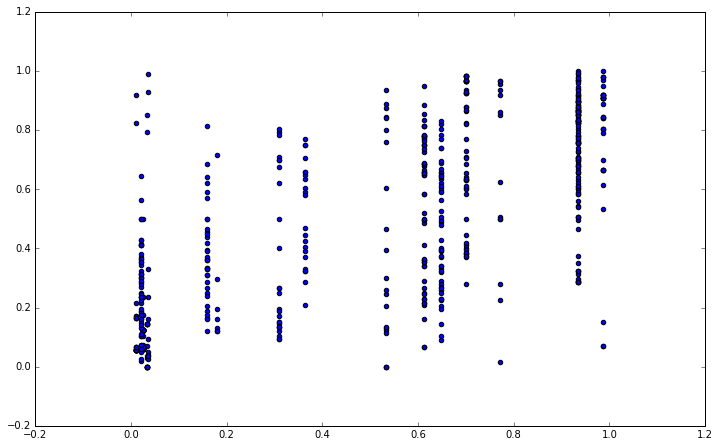

In [7]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

plt.scatter(p[:,:,1], results)


In [8]:
p_block = []
for block in range(N_blocks) :
    p_b = p[:,block,1]
    p_block.append(p_b)

In [9]:
V_a = []
for block in range(N_blocks) :
    v_a_t = []
    for trial in range(N_trials):
        va = (a_anti_0_1[block][trial]+1)/2
        v_a_t.append(va)
    V_a.append(v_a_t)

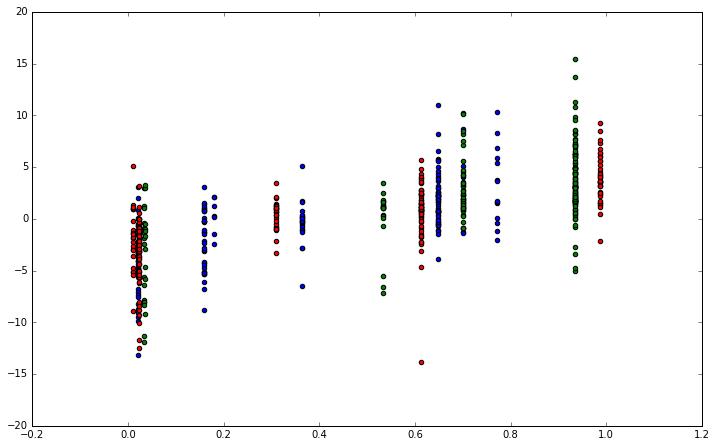

In [10]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

plt.scatter(p_block[0], V_a[0])
plt.scatter(p_block[1], V_a[1], c='r')
plt.scatter(p_block[2], V_a[2], c='g')


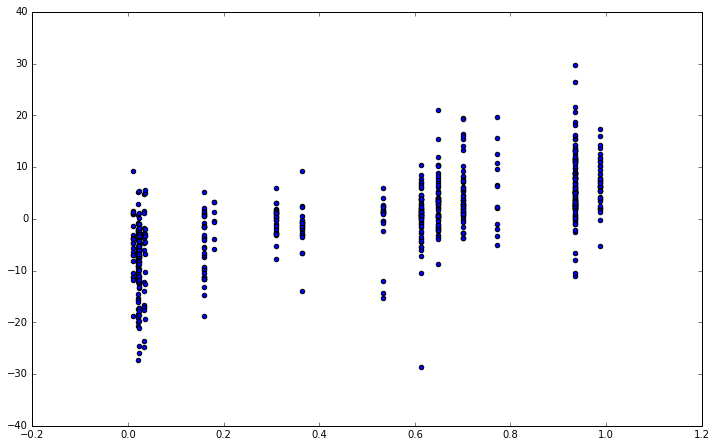

In [11]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))

plt.scatter(p_block, a_anti_0_1)

In [12]:
proba_switch = []
liste_switch = []
block_result_switch = []
block_a_anti_switch = []

block_m_result_switch = []
block_m_a_anti_switch = []

for block in range(N_blocks):

    switch = [0]
    p_switch = [p[0, block, 1]]
    for s in range(N_trials):
        if p[s, block, 2]==1 :
            switch.append(s)
            p_switch.append(p[s, block, 1])
    switch.append(N_trials)
    
    liste_switch.append(switch)
    proba_switch.append(p_switch)

    liste_result_switch = []
    liste_a_anti_switch = []
    
    liste_m_result_switch = []
    liste_m_a_anti_switch = []
    
    for s1 in range(len(switch)-1) :
        result_switch = results[switch[s1]:switch[s1+1], block]
        a_anti_switch = a_anti_0_1[block][switch[s1]:switch[s1+1]]

        liste_result_switch.append(result_switch)
        liste_a_anti_switch.append(a_anti_switch)

        m_result_switch = np.mean(results[switch[s1]:switch[s1+1], block])
        m_a_anti_switch = np.mean(a_anti_0_1[block][switch[s1]:switch[s1+1]])*100

        liste_m_result_switch.append(m_result_switch)
        liste_m_a_anti_switch.append(m_a_anti_switch)
        
        
    block_result_switch.append(liste_result_switch)
    block_a_anti_switch.append(liste_a_anti_switch)
    
    block_m_result_switch.append(liste_m_result_switch)
    block_m_a_anti_switch.append(liste_m_a_anti_switch)

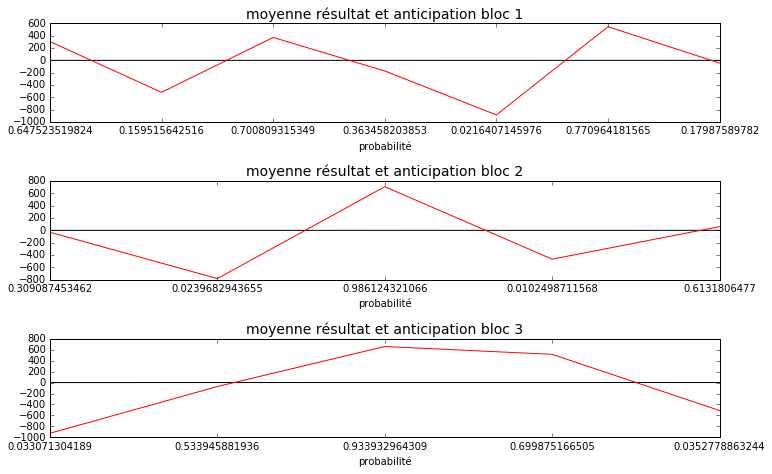

In [13]:
fig_width= 12
fig, axs = plt.subplots(N_blocks, 1, figsize=(fig_width, (fig_width)/1.6180))
fig.subplots_adjust(hspace=0.6)
dic = {}
for block in range(N_blocks):

    axs[block].plot(block_m_result_switch[block], c='k')
    axs[block].plot(block_m_a_anti_switch[block], c='r')
    
    axs[block].set_xticks(np.arange(len(proba_switch[block])))
    axs[block].set_xticklabels(proba_switch[block])
    axs[block].set_title('moyenne résultat et anticipation bloc %s'%(block+1), fontsize=14)
    axs[block].set_xlabel('probabilité')

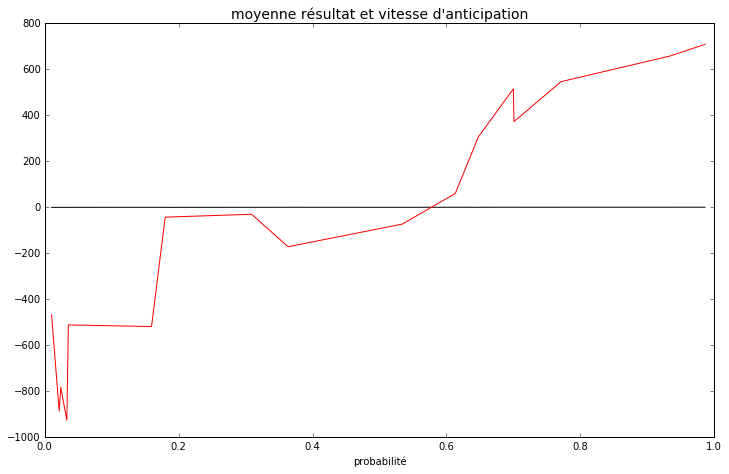

In [14]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))
dic_m_result = {}
dic_m_a_anti = {}

for block in range(N_blocks):
    #print('block', block)
    for s1 in range(len(proba_switch[block])) :
        dic_m_result[proba_switch[block][s1]] = block_m_result_switch[block][s1]
        dic_m_a_anti[proba_switch[block][s1]] = block_m_a_anti_switch[block][s1]
        #print(s1, proba_switch[block][s1], np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0])#[0][1])

res = sorted(dic_m_result.items())
proba = []
moyenne_resul = []

anti = sorted(dic_m_a_anti.items())
moyenne_anti = []

for x in range(len(res)):
    proba.append(res[x][0])
    moyenne_resul.append(res[x][1])
    moyenne_anti.append(anti[x][1])
#print("\nproba dans l'ordre = ", proba)
#print("\ncorrelation dans l'ordre = ", correlation)
plt.plot(proba, moyenne_resul, c='k')
plt.plot(proba, moyenne_anti, c='r')
plt.title("moyenne résultat et vitesse d'anticipation", fontsize=14)
plt.xlabel('probabilité')

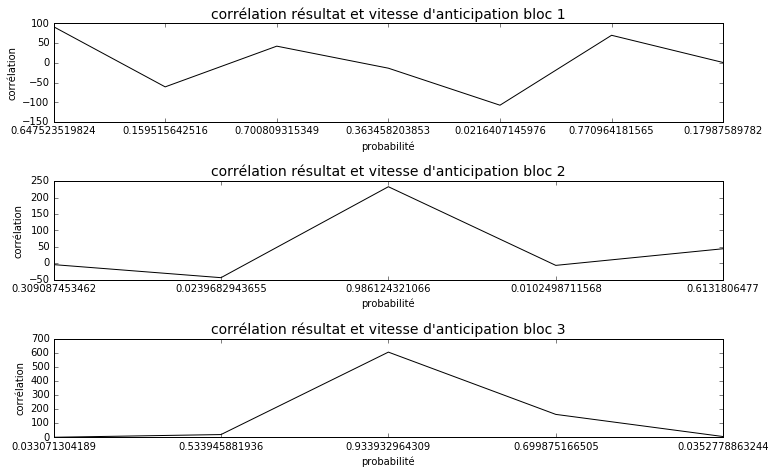

In [15]:
fig_width= 12
fig, axs = plt.subplots(N_blocks, 1, figsize=(fig_width, (fig_width)/1.6180))
fig.subplots_adjust(hspace=0.6)
dic = {}
for block in range(N_blocks):
    #print('block', block)
    corr = []
    for s1 in range(len(proba_switch[block])) :
        dic[proba_switch[block][s1]] = np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0]
        #print(s1, proba_switch[block][s1], np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0])#[0][1])
        corr.append(np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0])#[1])
    axs[block].plot(corr, c='k')
    axs[block].set_xticks(np.arange(len(proba_switch[block])))
    axs[block].set_xticklabels(proba_switch[block])
    axs[block].set_title("corrélation résultat et vitesse d'anticipation bloc %s"%(block+1), fontsize=14)
    axs[block].set_xlabel('probabilité')
    axs[block].set_ylabel('corrélation')

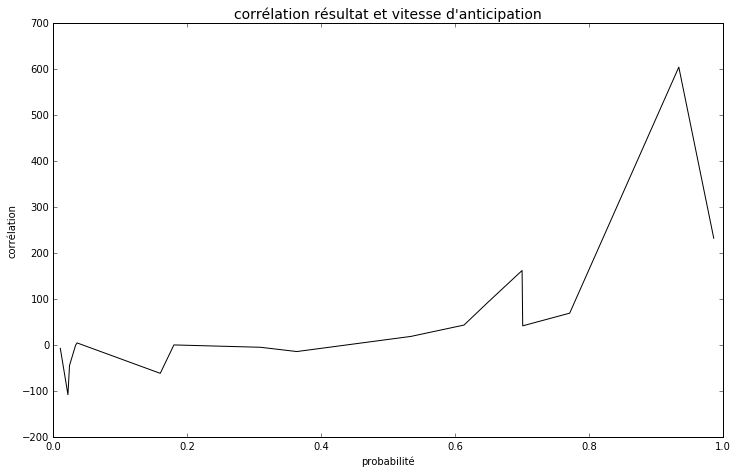

In [16]:
fig_width= 12
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width)/1.6180))
dic_corr = {}
for block in range(N_blocks):
    #print('block', block)
    for s1 in range(len(proba_switch[block])) :
        dic_corr[proba_switch[block][s1]] = np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0]
        #print(s1, proba_switch[block][s1], np.correlate(block_result_switch[block][s1], block_a_anti_switch[block][s1])[0])#[0][1])

corr = sorted(dic_corr.items())
proba = []
correlation = []
for x in range(len(corr)):
    proba.append(corr[x][0])
    correlation.append(corr[x][1])
#print("\nproba dans l'ordre = ", proba)
#print("\ncorrelation dans l'ordre = ", correlation)
plt.plot(proba, correlation, c='k')
plt.title("corrélation résultat et vitesse d'anticipation", fontsize=14)
plt.ylabel('corrélation')
plt.xlabel('probabilité')